## Table of Contents
* [Import Dependencies](##Import-Dependencies)
* [Part 1 : read file and load dataset with pandas](##Part-1-:-read-file-and-load-dataset-with-pandas)
    * [describe](###describe)
    * [tail](###tail)
    * [head](###head)
    * [info](###info)
* [Part 2 : replace numerical values](##Part-2-:-replace-numerical-values)
* [Part 3 : missing values](##Part-3-:-missing-values)
* [Part 4 : delete columns have unique values](##Part-4-:-delete-columns-have-unique-values)
* [Part 5 : show some details](##Part-5-:-show-some-details)
* [Part 6 : show some details](##Part-6-:-show-some-details)
* [Part 7 and 8 : compare loop and vectorization](##Part-7-and-8-:-compare-loop-and-vectorization)
    * [using vectorization](###using-vectorization)
    * [using for loop](######using-for-loop)
    * [compare](###compare)
* [Part 9 : histogram](##Part-9-:-histogram)
* [Part 10 : normalize data](##Part-10-:-normalize-data)
* [Part 11 : survived and nonSurvived PDF](##Part-11-:-survived-and-nonSurvived-PDF)
* [Part 12 : predict](##Part-12-:-predict)

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
np.warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

## Part 1 : read file and load dataset with pandas

In [2]:
dataFrame = pd.read_csv('train.csv')

### describe

In [3]:
dataFrame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



in output of describe we of these items for each column:
* count : the number of non-empty values of that item
* mean : the average value of that item
* std : the standard deviation of that item
* min : the minimum value of that item
* x percentage : The x% percentile of that item
* max : the maximum value of that item

### tail


In [4]:
dataFrame.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


this method prints bottom n-rows and as default n = 5. we can change it by give number to method.


In [5]:
dataFrame.tail(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


also we can choose special coloums.

In [6]:
dataFrame[['Name' , 'Sex']].tail(3)

,Name,Sex
888,"Johnston, Miss. Catherine Helen ""Carrie""",female
889,"Behr, Mr. Karl Howell",male
890,"Dooley, Mr. Patrick",male


### head


In [7]:
dataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


this method prints top n-rows and as default n = 5. we can change it by give number to method.
like tail we can change the output.

In [8]:
dataFrame.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [9]:
dataFrame[['Name' , 'Sex']].head(3)

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female


### info


In [10]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


info() method prints:
* number of columns
* column titles
* data types
* memory usage
* range index
* number of cells that have value(they are not non-value)

## Part 2 : replace numerical values
in previous part we saw that we can get data types with info() also we can get it with dataFrame.dtypes.

In [11]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
dataFrame.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

now we replace 'Sex' and 'Embarked' with numerical values.

In [13]:
newDataFrame = dataFrame.copy()
newDataFrame['Sex'] = newDataFrame['Sex'].replace({'female' : 0, 'male' : 1})
newDataFrame['Embarked'] = newDataFrame['Embarked'].replace({'C' : 0, 'S' : 1,'Q' : 2})
newDataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,1.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0.0


## Part 3 : missing values 
first we numerate advantages and disadvantages of replacing missing values with mean value
advantages.
* It can prevent missing data
* When we work with small data size , it is better aproach
disadvantages
* does not preserve relationships between variables such as correlations
* shrinks standard errors, which invalidates most hypothesis tests and the calculation of confidence interval
* reduces the variance of the imputed variables 

now we show columns have missing values.

In [14]:
newDataFrame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

show on plot.

Text(0, 0.5, 'Missing Values')

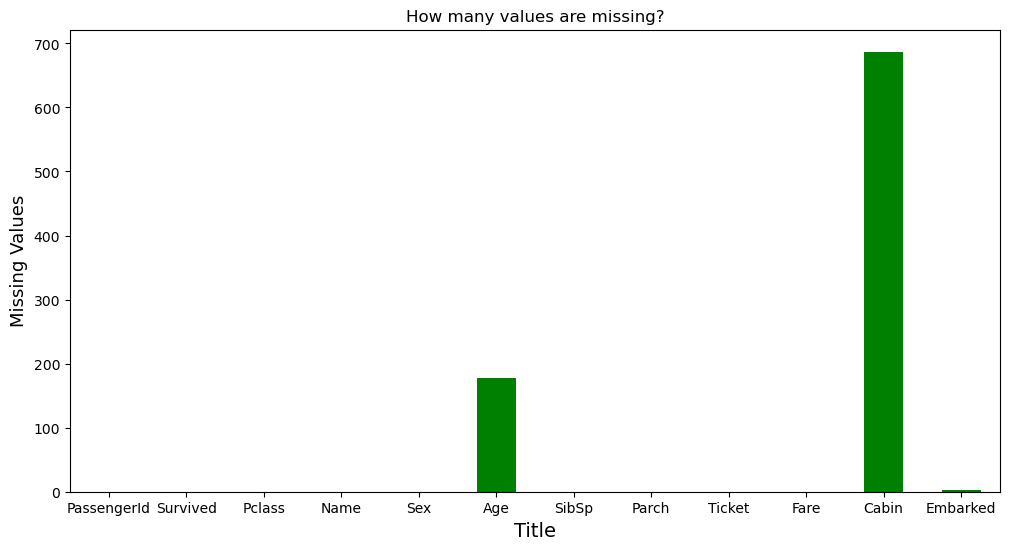

In [15]:
plt.figure(figsize=(12,6))
ax = newDataFrame.isnull().sum().plot.bar(x='lab', y='val', rot=0, color='green')
plt.title('How many values are missing?')
plt.xlabel('Title', fontsize=14)
plt.ylabel('Missing Values', fontsize=13)

now we replace missing values with mean value.
for 'Cabin' and 'Embarked' we have no numercial value. so first we have to see which value has most occuring, then we replace that.

In [16]:
cabinMode = newDataFrame['Cabin'].value_counts().idxmax()
embarkedMode = newDataFrame['Embarked'].value_counts().idxmax()

newDataFrame['Age'].fillna(value=newDataFrame['Age'].mean(), inplace=True)
newDataFrame['Cabin'].fillna(cabinMode, inplace=True)
newDataFrame['Embarked'].fillna(embarkedMode, inplace=True)

newDataFrame.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

show on plot.

Text(0, 0.5, 'Missing Values')

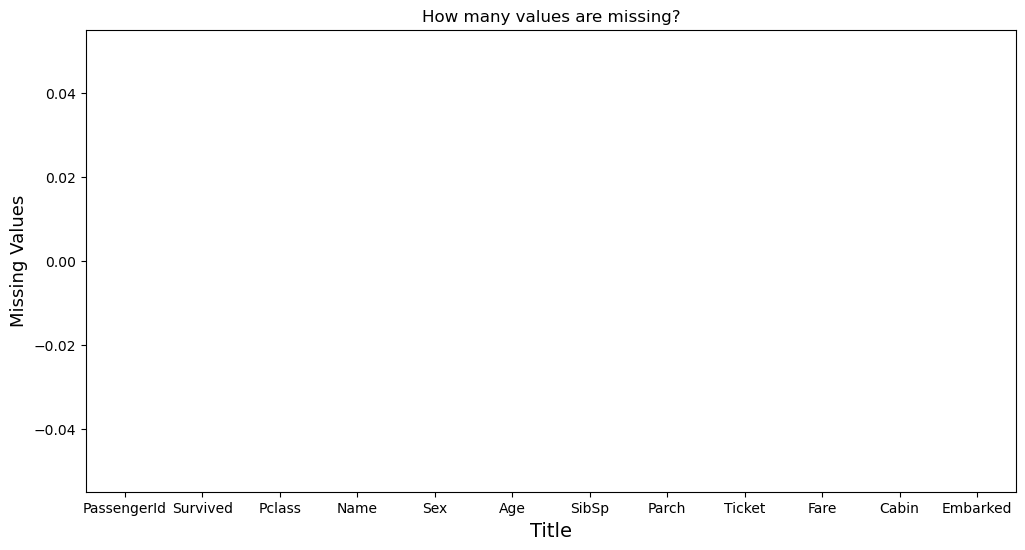

In [17]:
plt.figure(figsize=(12,6))
ax = newDataFrame.isnull().sum().plot.bar(x='lab', y='val', rot=0, color='green')
plt.title('How many values are missing?')
plt.xlabel('Title', fontsize=14)
plt.ylabel('Missing Values', fontsize=13)

## Part 4 : delete columns have unique values

In [18]:
targetColumns = newDataFrame.apply(pd.Series.duplicated).any()
newDataFrame.drop(list(targetColumns[~targetColumns].index), axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,A/5 21171,7.2500,B96 B98,1.0
1,1,1,0,38.000000,1,0,PC 17599,71.2833,C85,0.0
2,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,1.0
3,1,1,0,35.000000,1,0,113803,53.1000,C123,1.0
4,0,3,1,35.000000,0,0,373450,8.0500,B96 B98,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,211536,13.0000,B96 B98,1.0
887,1,1,0,19.000000,0,0,112053,30.0000,B42,1.0
888,0,3,0,29.699118,1,2,W./C. 6607,23.4500,B96 B98,1.0
889,1,1,1,26.000000,0,0,111369,30.0000,C148,0.0


## Part 5 : show some details
1 stands for male and 0 stands for female.

In [19]:
newDataFrame['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

show on plot.

Text(0, 0.5, 'number')

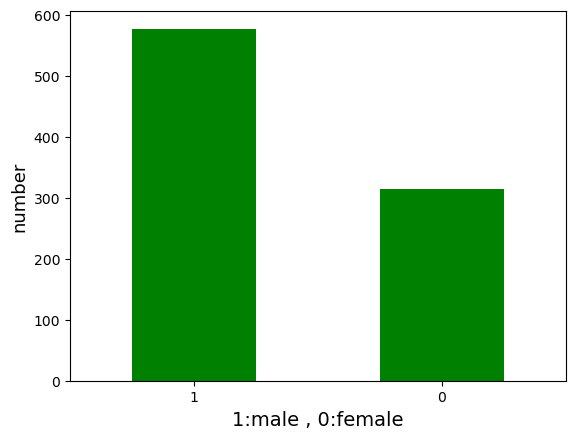

In [20]:
ax = newDataFrame['Sex'].value_counts().plot.bar(x='lab', y='val', rot=0, color='green')
plt.xlabel('1:male , 0:female', fontsize=14)
plt.ylabel('number', fontsize=13)

now show from Southampton men.

In [21]:
Southampton = 1
man = 1
res = newDataFrame[(newDataFrame['Sex'] == man) & (newDataFrame['Embarked'] == Southampton)]
print('men are boarded to Southampton:', len(res))

men are boarded to Southampton: 441


## Part 6 : show some details

In [22]:
minAge = 35
typeOfPclass = 3
numOfRelatives = 0
res = newDataFrame[(newDataFrame['Age'] > minAge) & (newDataFrame['Pclass'] == typeOfPclass) & (newDataFrame['SibSp'] + newDataFrame['Parch']  == numOfRelatives)]
print('number of people are older than 35 and have 3 type ticket and have no relative:', len(res))

number of people are older than 35 and have 3 type ticket and have no relative: 41


## Part 7 and 8 : compare loop and vectorization 

a calculation first using vectorization library second use loop.
### using vectorization

In [23]:
%%time
Queenstown = 2
res = newDataFrame[newDataFrame['Embarked'] == Queenstown]
res['Fare'].mean()

CPU times: total: 0 ns
Wall time: 0 ns


13.276029870129872

### using for loop

In [24]:
%%time
Queenstown = 2
sum , count = 0 , 0
for i in range(0,len(newDataFrame)):
    if newDataFrame.iloc[i]['Embarked'] == Queenstown:
        count += 1
        sum += newDataFrame.iloc[i]['Fare']
mean = sum / count
print("mean :",mean)

mean : 13.276029870129872
CPU times: total: 62.5 ms
Wall time: 53.4 ms


### compare
calculation with vectorization is faster than for loop.
because vectorization is a style of programming that deals with entire arrays instead of individual elements. This often speeds up computation.
another reaason is due to the underlying implementation of Numpy operations.(in for loop variables have dynamic type and during runtime, each individual element in the list has to be checked (type check) when performing a certain operation. This will add certain overhead to a regular list)

## Part 9 : histogram

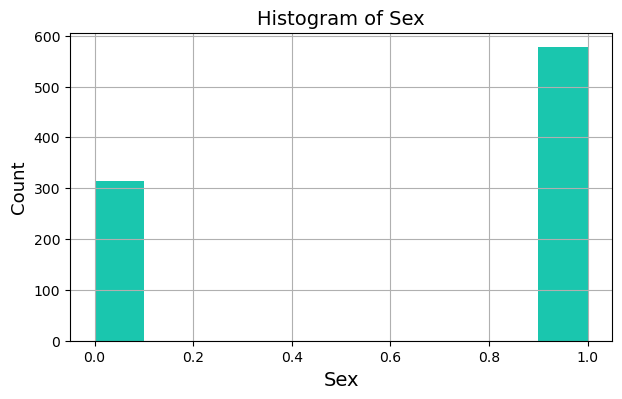

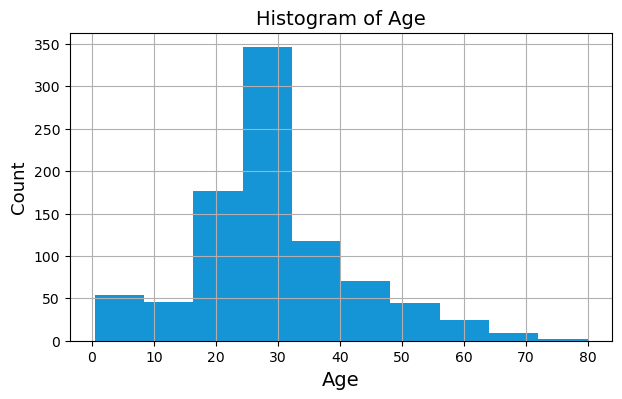

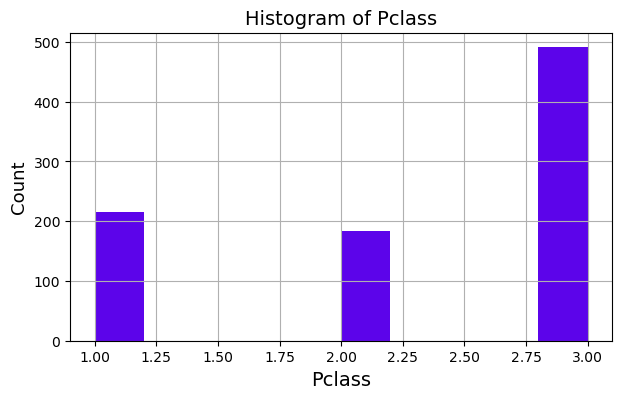

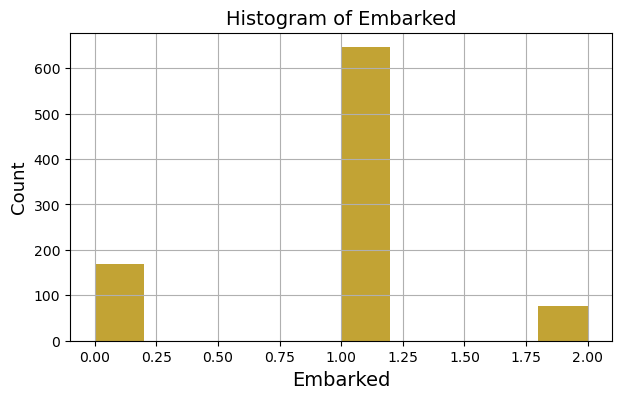

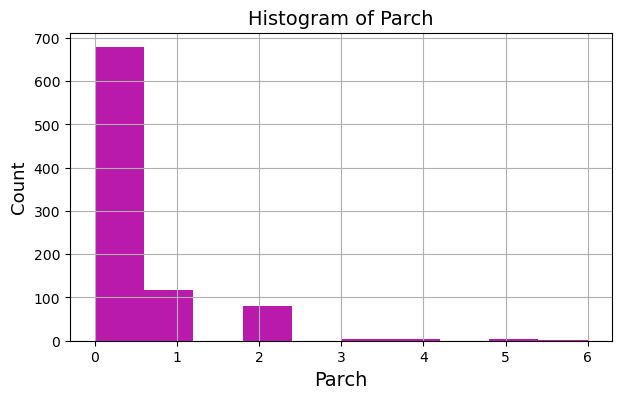

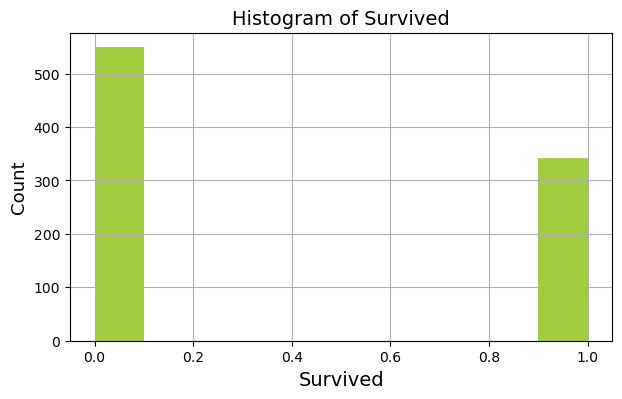

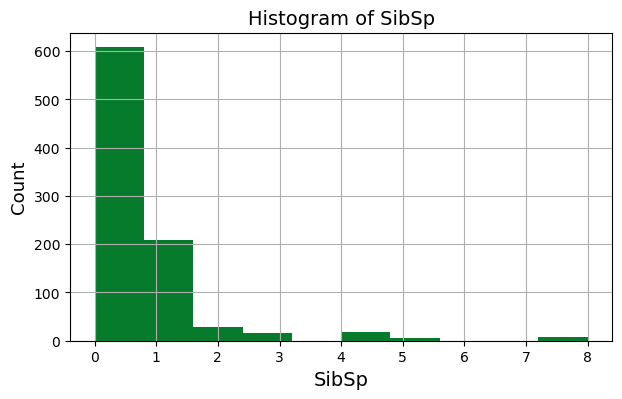

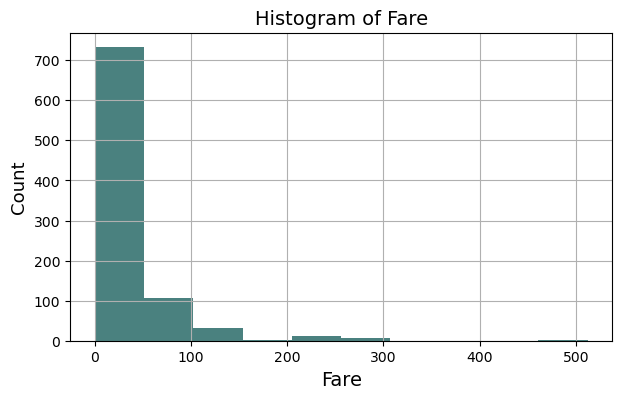

In [25]:
targetTitles = {'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'}
for title in targetTitles:
    plt.figure() 
    plt.title('Histogram of ' + title, fontsize = 14)
    plt.xlabel(title, fontsize = 14)
    plt.ylabel('Count', fontsize = 13)
    randomColor = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
    newDataFrame[title].hist(color = randomColor, figsize=(7,4))

## Part 10 : normalize data
first we define normalizeColumn function for normalizing then use it.

In [26]:
def normalizeColumn(column):
    mean = column.mean()
    std = column.std()
    return (column-mean)/std

In [27]:
targetTitles = {'Age', 'SibSp', 'Parch', 'Fare'}
for title in targetTitles:
    newDataFrame[title] = normalizeColumn(newDataFrame[title])

show on plot (compare it with without normalizing).

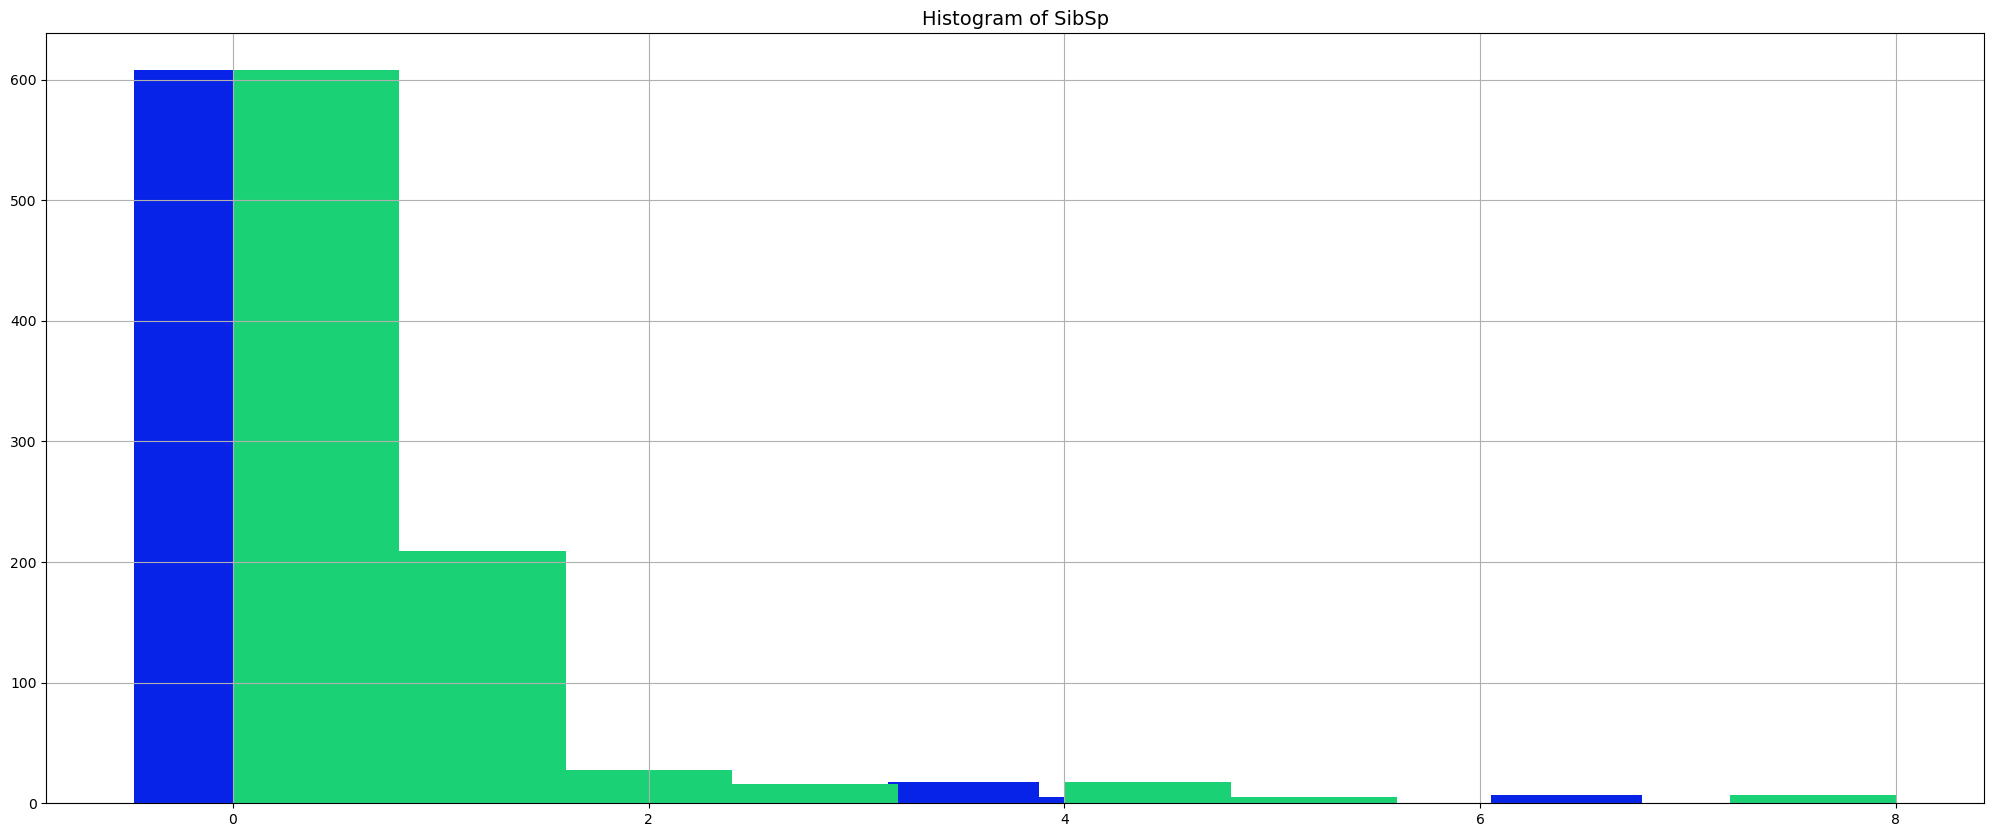

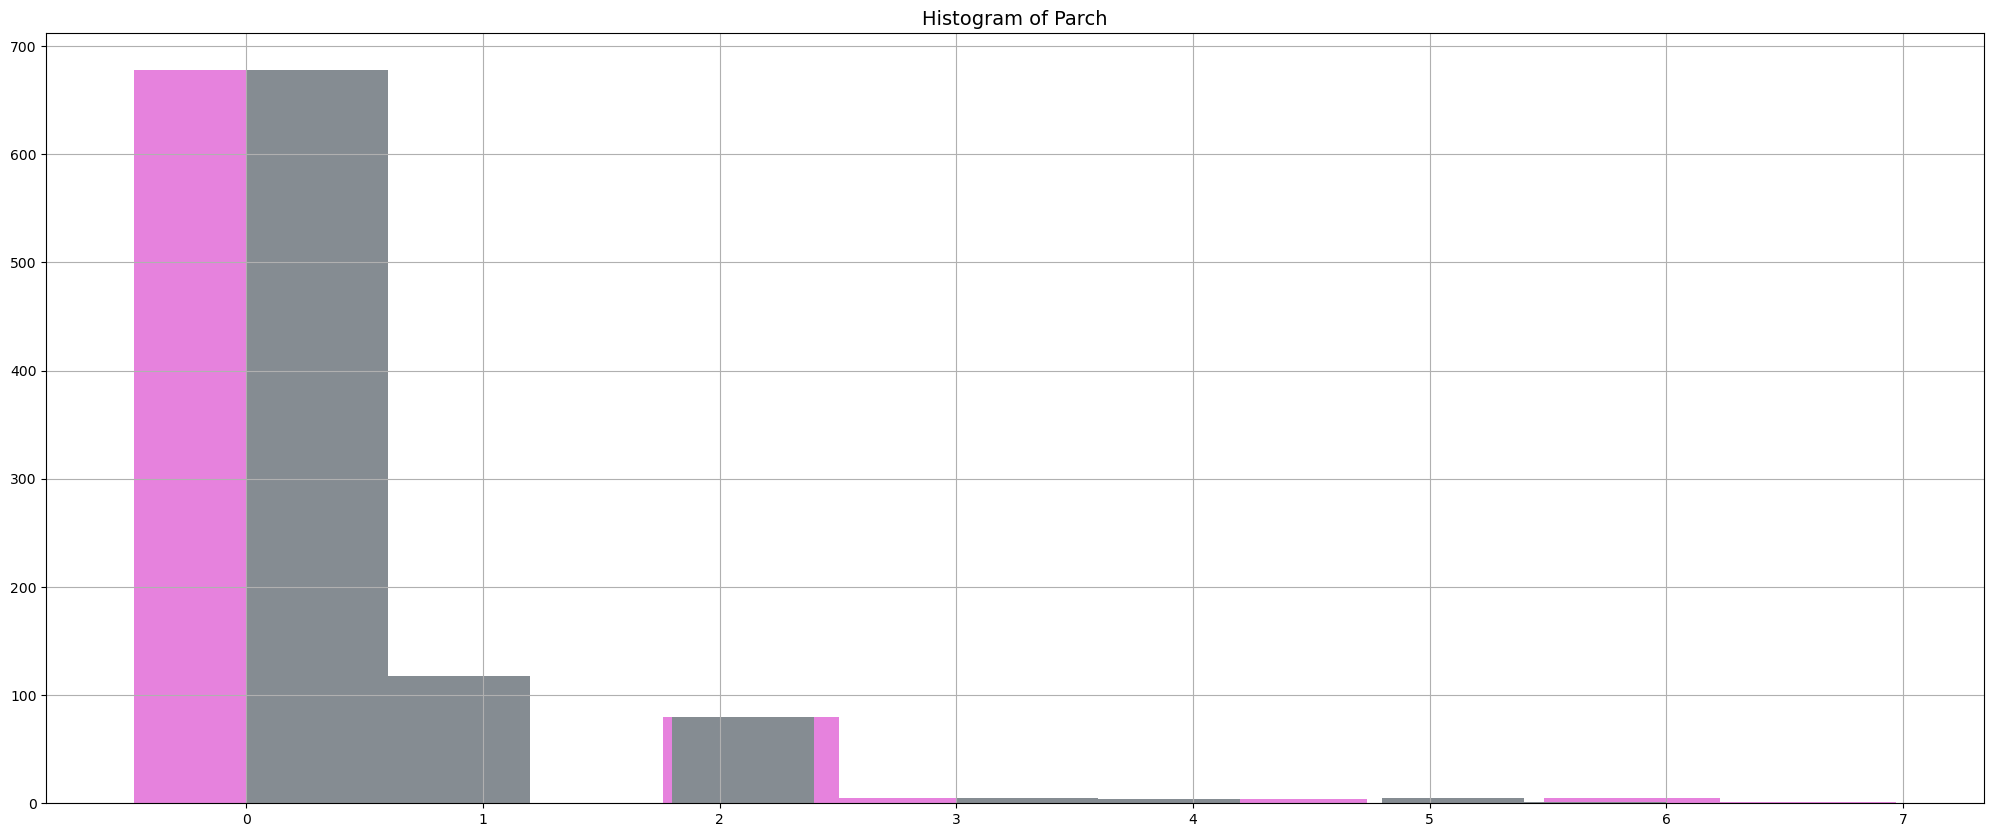

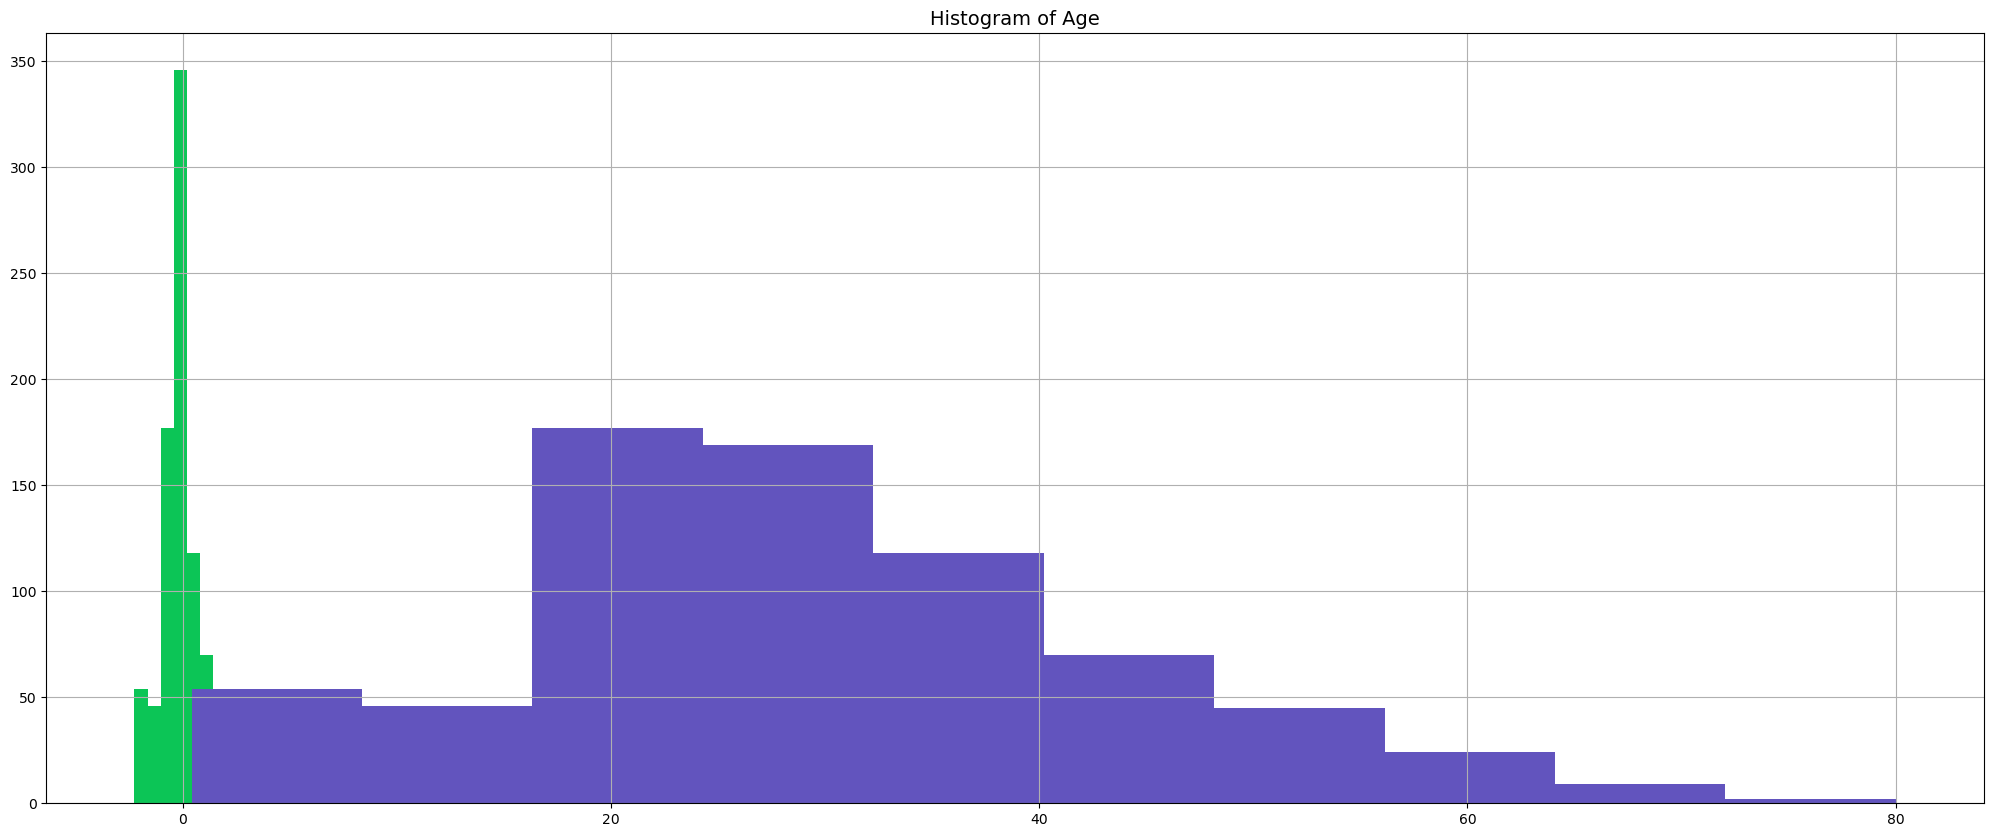

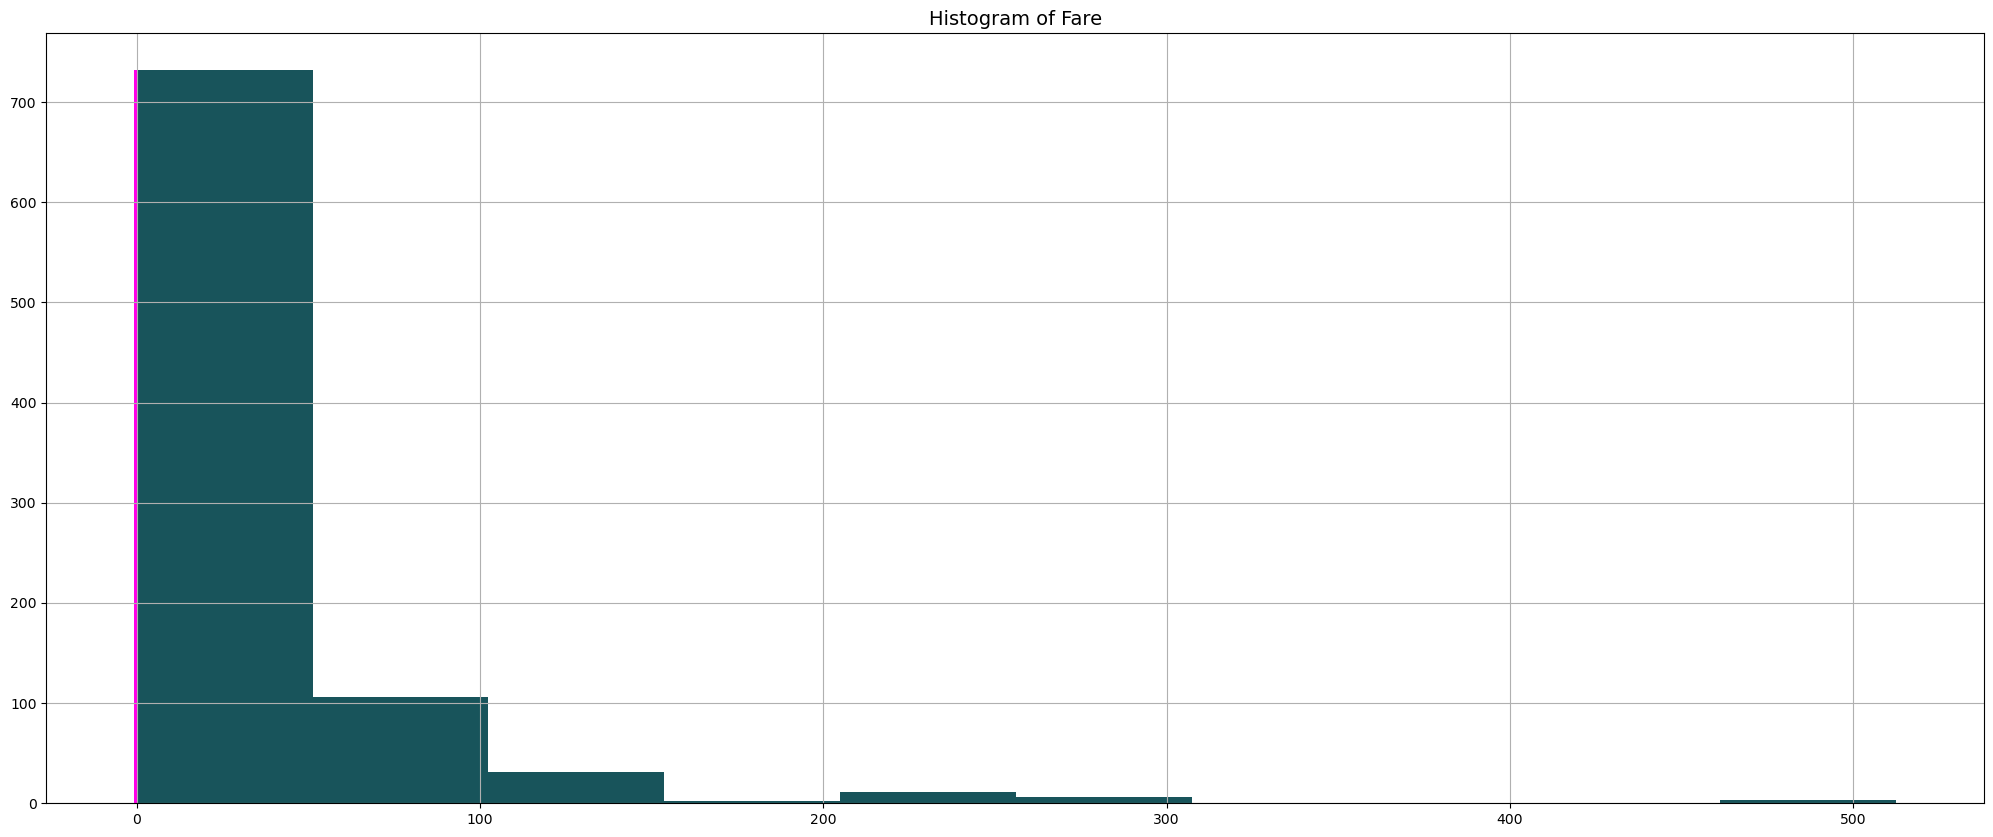

In [28]:
targetTitles = {'Age', 'SibSp', 'Parch', 'Fare'}
for title in targetTitles:
    plt.figure() 
    plt.title('Histogram of ' + title, fontsize = 14)
    randomColor = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
    newDataFrame[title].hist(figsize=(25,10), color = randomColor)
    randomColor = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
    dataFrame[title].hist(figsize=(25,10), color = randomColor)

## Part 11 : survived and nonSurvived PDF
fist we save survived and not survived passengesr in two variables.

In [29]:
dataFrameForSurvived = newDataFrame[dataFrame['Survived'] == 1]
dataFrameForNonSurvived = newDataFrame[dataFrame['Survived'] == 0]

in next step we difine functions compareSurvivedAndNonSurvived and drawDiagram. first one for give element for comparing and second one for drawing.

In [30]:
def drawDiagram(muSurvived,sigmaSurvived, muNotSurvived, sigmaNotSurvived,column_name):
    mu = muSurvived
    sigma = sigmaSurvived
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))

    mu = muNotSurvived
    sigma = sigmaNotSurvived
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))

    plt.legend(['Survived', 'NotSurvived'], loc='upper left')
    plt.title(f'Survived vs NotSurvived with {column_name} parameter',fontsize = 14)
    plt.show()

In [31]:
def compareSurvivedAndNonSurvived(parameter):
    survivedMuAge = dataFrameForSurvived[parameter].mean()
    survivedStdAge = dataFrameForSurvived[parameter].std()

    nonSurvivedMuAge = dataFrameForNonSurvived[parameter].mean()
    nonSurvivedStdAge = dataFrameForNonSurvived[parameter].std()
    
    print(parameter)
    print('Mean difference : ', abs(survivedMuAge - nonSurvivedMuAge))
    print('std survived :', survivedStdAge,'std notSurvived:', nonSurvivedStdAge)

    drawDiagram(survivedMuAge, survivedStdAge, nonSurvivedMuAge, nonSurvivedStdAge, parameter)


now we draw diagram for some of parameters

Sex
Mean difference :  0.5337455661010448
std survived : 0.4666604193350714 std notSurvived: 0.3549678209119414


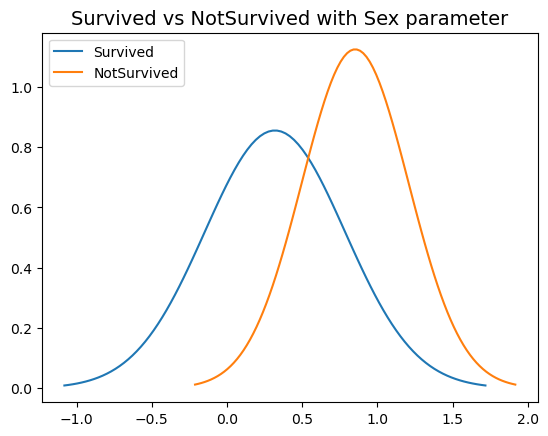

Parch
Mean difference :  0.16775723989967734
std survived : 0.957391107504523 std notSurvived: 1.0212252754556703


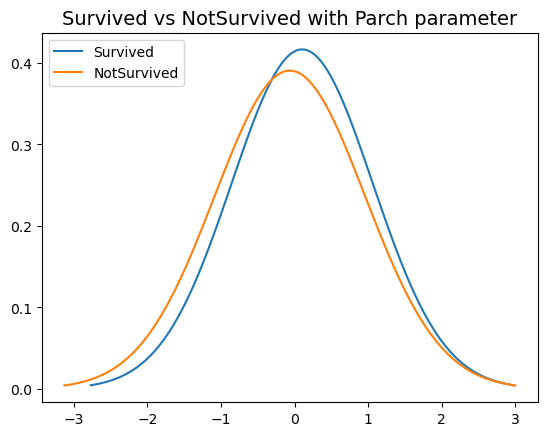

Age
Mean difference :  0.1434640317072111
std survived : 1.059258694165856 std notSurvived: 0.9581107320082077


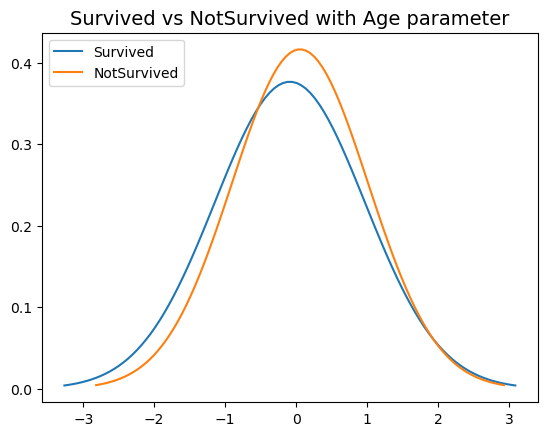

SibSp
Mean difference :  0.07259154673719923
std survived : 0.6426585716317935 std notSurvived: 1.1683580266780005


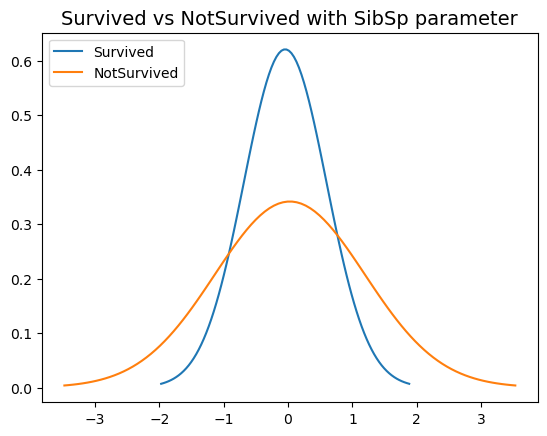

Fare
Mean difference :  0.5287926685457962
std survived : 1.340157038833758 std notSurvived: 0.6316369672336241


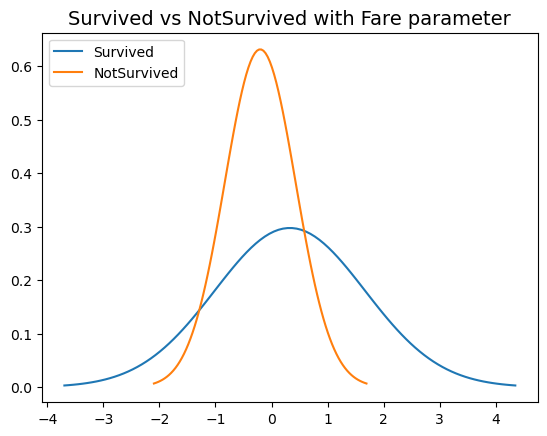

In [32]:
targetTitles = {'Age', 'Fare', 'Parch', 'SibSp', 'Sex'}
for title in targetTitles:
    compareSurvivedAndNonSurvived(title)

### Wich parameter is beter ?
we should decide this by this resons (respectively):
1- biggest difference of mean value 
2- low variance

between these paramters it's better to choose 'Sex' because has biggest difference of mean value(it's OK if we choose 'Age' or 'Parch').


## Part 12 : predict

fisrt we define predict function, read test.csv file. then predict and replace result in dataframe and finally write prediction.csv.

In [33]:
survived = 1
notSurvived = 0
sexMeanSurvived , sexMeanNonSurvived = dataFrameForSurvived['Sex'].mean() , dataFrameForNonSurvived['Sex'].mean()
sexStdSurvived , sexStdNonSurvived = dataFrameForSurvived['Sex'].std() , dataFrameForNonSurvived['Sex'].std()

def predict(parameter):
    isMale = 1 if parameter=='male' else 0
    probSurvived = stats.norm.pdf(isMale, sexMeanSurvived, sexStdSurvived)
    probNotSurvived = stats.norm.pdf(isMale, sexMeanNonSurvived, sexStdNonSurvived)
    return survived if probSurvived > probNotSurvived else notSurvived

in previous part we choose Sex as target parameter, now use it.

In [34]:
targetParameter = 'Sex'
File = pd.read_csv("test.csv")

In [35]:
File['Survived'] = File[targetParameter].apply(predict)
File['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [36]:
File['Survived'].to_csv('prediction.csv', encoding = 'utf-8')

show on plot.

Text(0, 0.5, 'number')

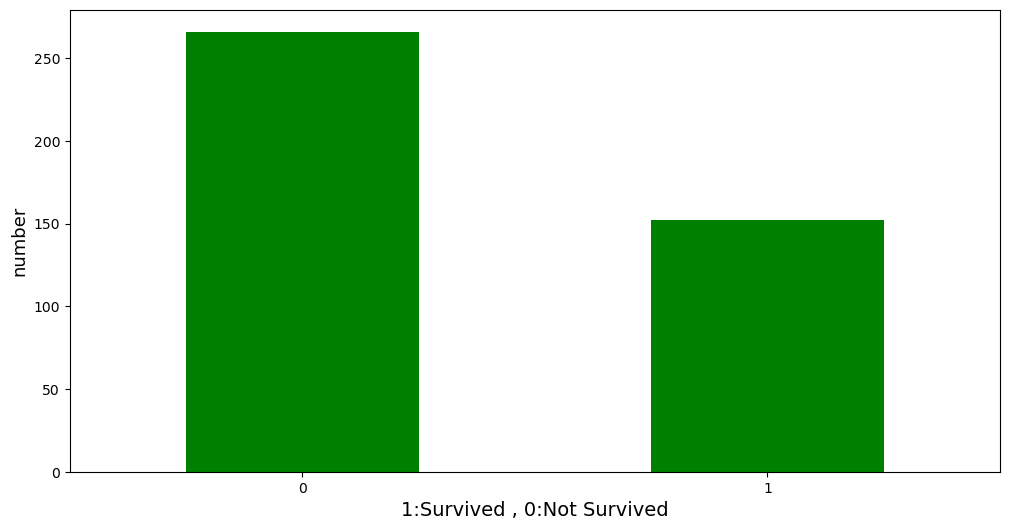

In [37]:
plt.figure(figsize=(12,6))
ax = File['Survived'].value_counts().plot.bar(x='lab', y='val', rot=0, color='green')
plt.xlabel('1:Survived , 0:Not Survived', fontsize=14)
plt.ylabel('number', fontsize=13)